In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('mpl_styles/example1.mplstyle')

# Introduction into matplotlib.pyplot

## Using matplotlib pyplot
For quick plotting we can directly use the matplotlib.pyplot functions. The different available plots can be found in the [matplotlib documentation](https://matplotlib.org/stable/plot_types/index.html).

Text(0, 0.5, 'sin(x)')

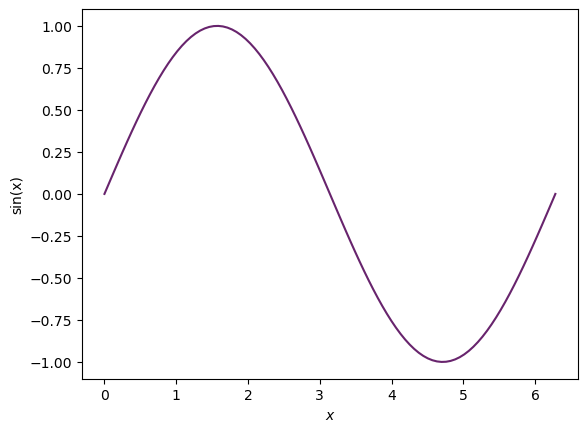

In [24]:
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1)
plt.xlabel("$x$")
plt.ylabel("sin(x)")

## If there are multiple plots using subplots is usually the better idea

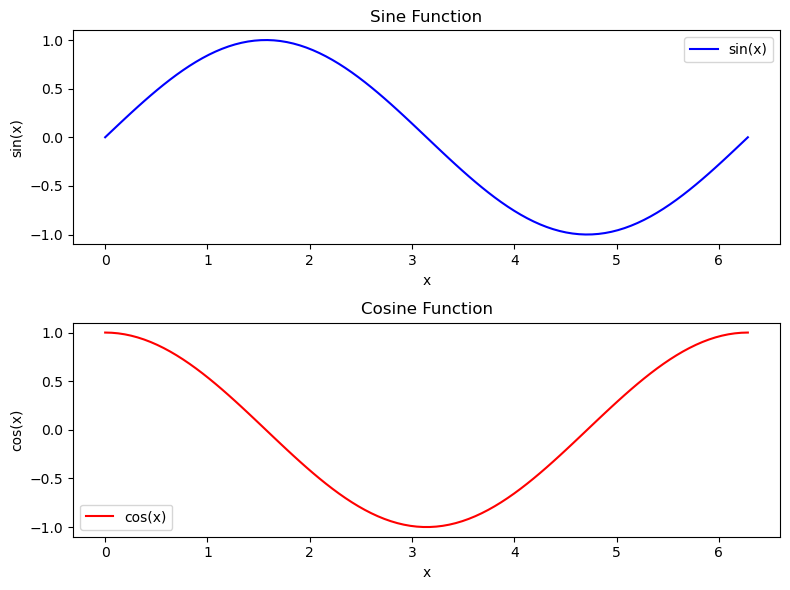

In [25]:
# Create a figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Plot the data on the subplots
axs[0].plot(x, y1, color='blue', label='sin(x)')
axs[1].plot(x, y2, color='red', label='cos(x)')

# Set titles and labels for each subplot
axs[0].set_title('Sine Function')
axs[0].set_xlabel('x')
axs[0].set_ylabel('sin(x)')
axs[1].set_title('Cosine Function')
axs[1].set_xlabel('x')
axs[1].set_ylabel('cos(x)')

# Add legends to the subplots
axs[0].legend()
axs[1].legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


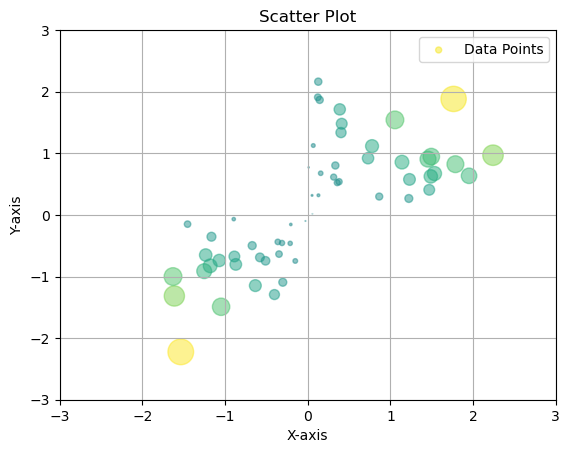

In [34]:
# Generate random data
np.random.seed(0)
x = np.random.randn(100)
y = np.random.randn(100)

# Create a scatter plot
fig, ax = plt.subplots()
ax.scatter(
    x, y, c=x * y* 100, marker='o', 
    s=x * y* 100,
    alpha=0.5
)

# Set plot title and labels
ax.set_title('Scatter Plot')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Customize plot appearance
ax.grid(True)
ax.legend(['Data Points'])
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

# Show the plot
plt.show()

## We can also set styles using an mplstyle file
This allows us to have consistent styling options within a body of work (paper). On the other hand we can use a different style sheet for another use case (e.g. a presentation, the thesis...)